In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

In [62]:
df=pd.read_csv('../../../../resource-datasets/unemployment_timeseries/seasonally-adjusted-quarterly-us.csv')

In [63]:
df.dropna(inplace=True)
df.columns=['quarter','unemployment']

In [64]:
df.unemployment=df.unemployment.map(lambda x: float(str(x)[:-1])/100)

In [65]:
df['date']=pd.to_datetime(df.quarter).dt.to_period('Q')
df.set_index('date',inplace=True,drop=True)
df.drop('quarter',axis=1,inplace=True)

In [66]:
# different way one line.
#df.index = pd.to_datetime(df.quarter).dt.to_period('Q')

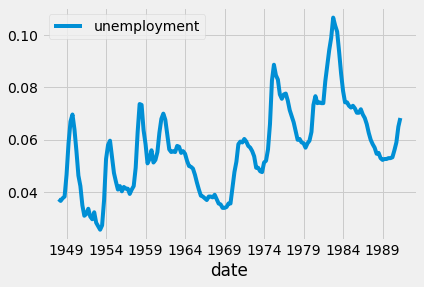

In [68]:
df.plot()

In [150]:
urate = df.unemployment

aurate=urate.autocorr(172)


In [151]:
[urate.autocorr(k) for k in range(20)]

[1.0,
 0.9648069187085503,
 0.8845761825959341,
 0.7864722515546801,
 0.6915437416214167,
 0.6153518563834129,
 0.5607638212396637,
 0.5208758982607196,
 0.48991527733338547,
 0.4663424209703513,
 0.4434691993620028,
 0.4178318352441328,
 0.39321797923625845,
 0.37490436245716685,
 0.36294138330411596,
 0.3603214796832382,
 0.36243805672588886,
 0.35882729974151983,
 0.3436061679933478,
 0.31740037356699247]

In [152]:
#find autocorr with stat model
from statsmodels.tsa.stattools import acf
acf(urate,nlags=20)

array([1.        , 0.95950578, 0.87513008, 0.77480906, 0.67860558,
       0.60302767, 0.54946953, 0.50980855, 0.47862666, 0.45530485,
       0.43290704, 0.40733564, 0.38242446, 0.36262662, 0.34831031,
       0.34311303, 0.34269765, 0.33602242, 0.31802897, 0.29043284,
       0.25556895])

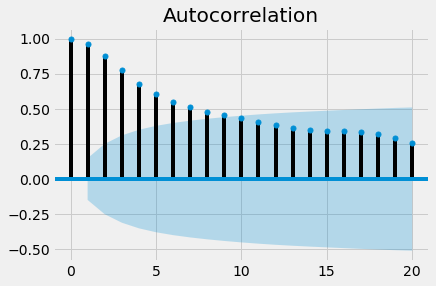

In [153]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(urate,lags=20);

In [154]:
#pacf
from statsmodels.tsa.stattools import pacf
pacf(urate,nlags=20)

array([ 1.        ,  0.96505205, -0.67010933,  0.21691526,  0.07494577,
        0.21322536, -0.09593115, -0.05491075,  0.07521878,  0.14700603,
       -0.18064033, -0.01381037,  0.1414165 ,  0.13517355, -0.10704305,
        0.10418921, -0.0958789 , -0.08324834, -0.07692577,  0.08321147,
       -0.05132902])

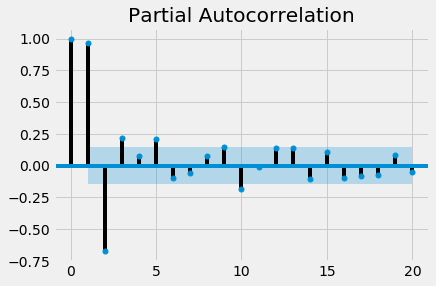

In [155]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(urate,lags=20);

In [159]:
# isolate the different behavior of time series, we want to decompose. 
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_resualt= seasonal_decompose(urate,)
decomp_resualt.plot();

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''